<a href="https://colab.research.google.com/github/Paresh1879/Diabetes-Detection-using-Tensorflow/blob/main/Diabetes_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from imblearn.over_sampling import RandomOverSampler

In [ ]:
df = pd.read_csv('diabetes.csv')

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


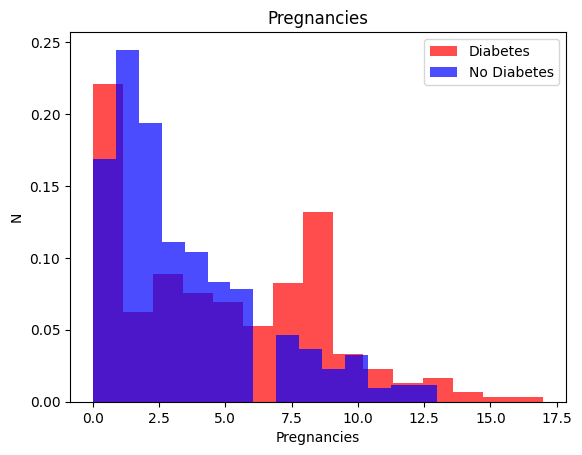

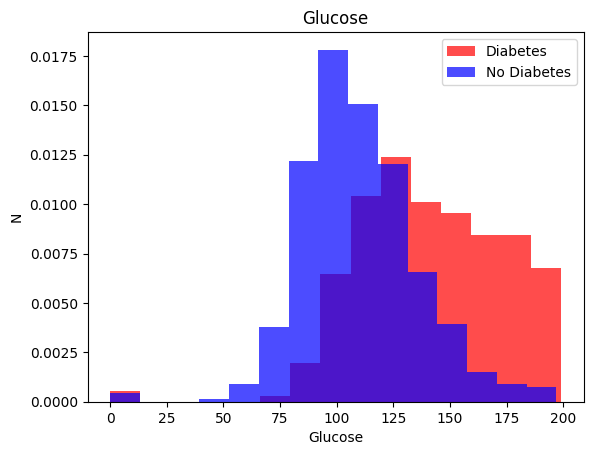

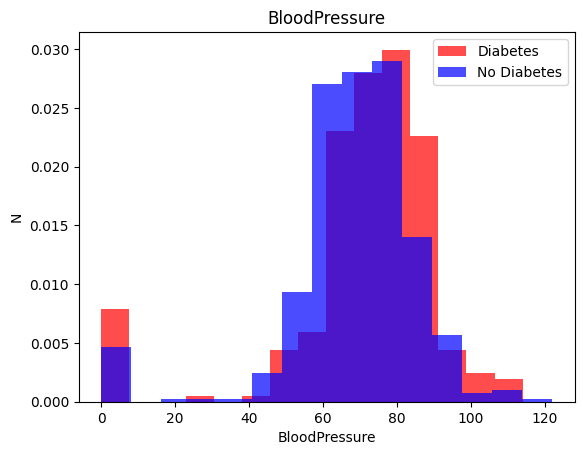

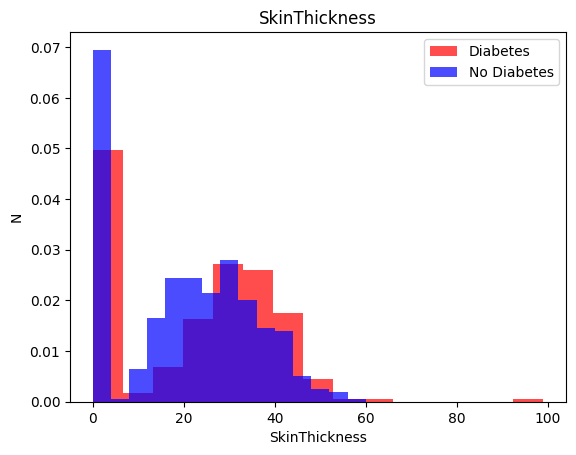

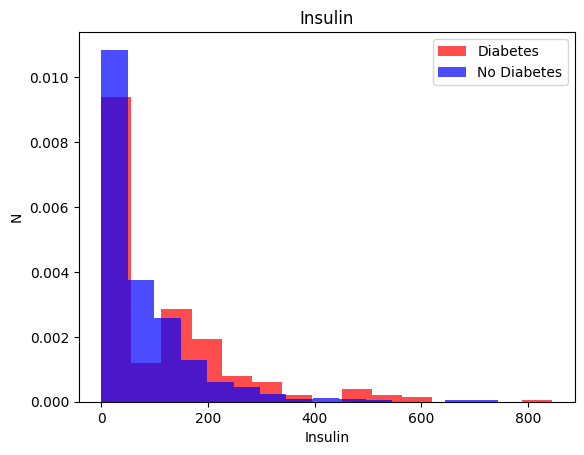

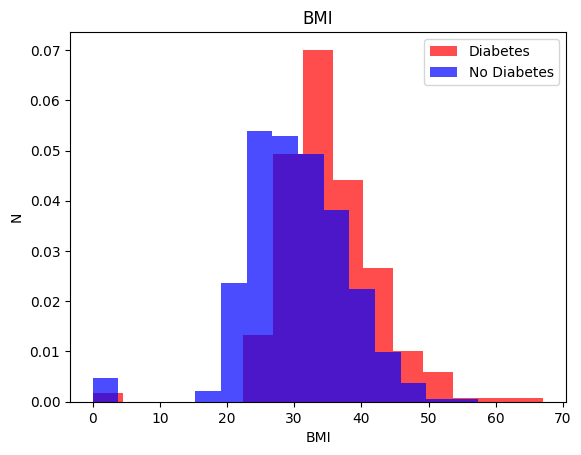

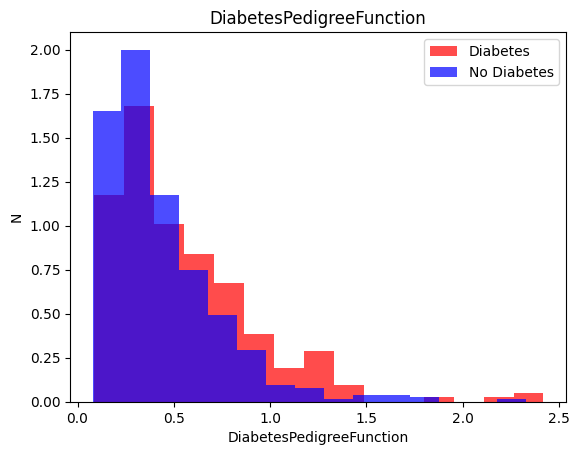

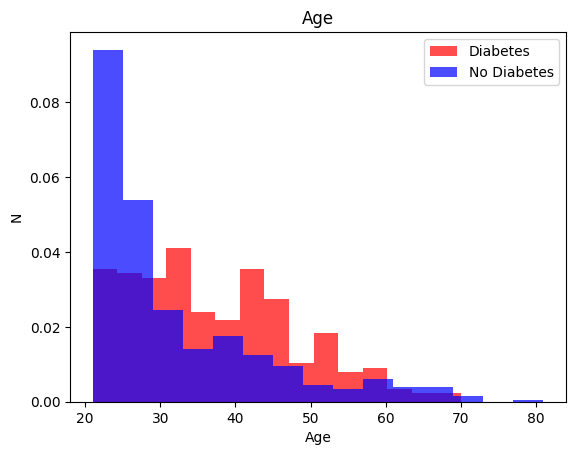

In [ ]:
for i in range(len(df.columns[:-1])):
  label = df.columns[i]
  plt.hist(df[df['Outcome']==1][label],color = 'red',label = 'Diabetes',alpha = 0.7, density = True,bins=15)
  plt.hist(df[df['Outcome']==0][label], color='blue',label = 'No Diabetes',alpha = 0.7, density = True,bins=15)
  plt.title(label)
  plt.ylabel('N')
  plt.xlabel(label)
  plt.legend()
  plt.show()

In [ ]:
X = df[df.columns[:-1]].values
y = df['Outcome'].values

In [ ]:
X

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [ ]:
y

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,

In [ ]:
scale = StandardScaler()
X = scale.fit_transform(X)
data = np.hstack((X,np.reshape(y,(-1,1))))
transformed_df = pd.DataFrame(data, columns=df.columns)

In [ ]:
over = RandomOverSampler()
X,y = over.fit_resample(X,y)
data = np.hstack((X,np.reshape(y,(-1,1))))
transformed_df = pd.DataFrame(data, columns=df.columns)

In [ ]:
len(transformed_df[transformed_df['Outcome']==1]), len(transformed_df[transformed_df['Outcome']==0])

(500, 500)

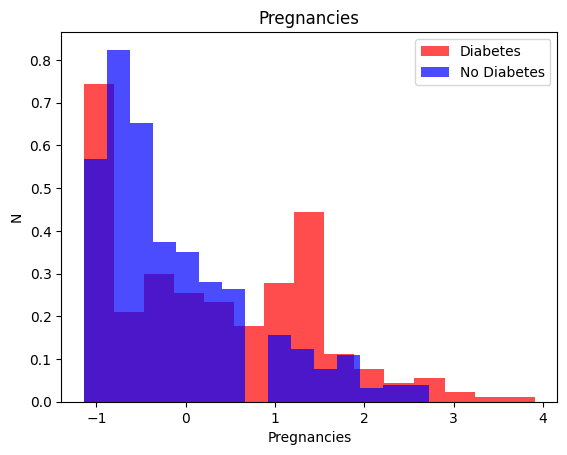

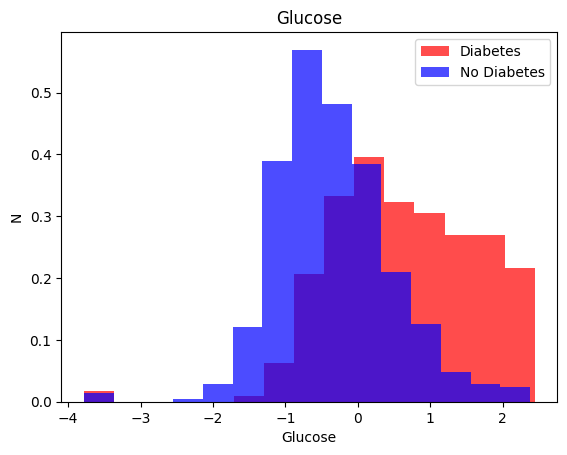

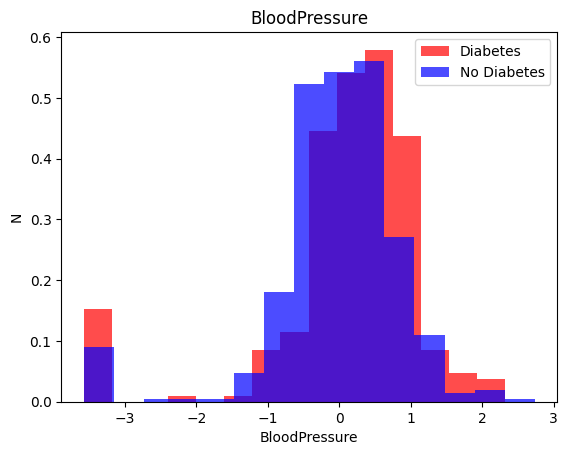

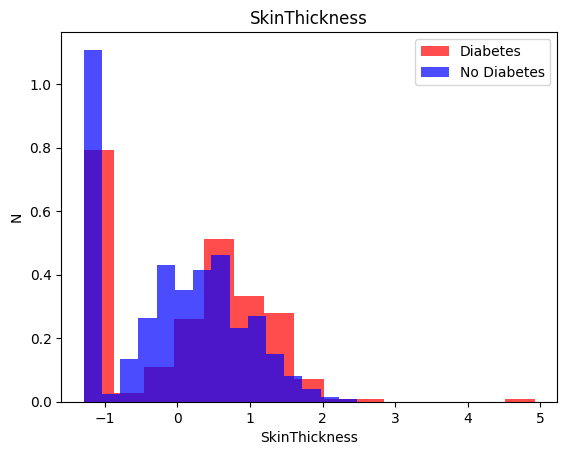

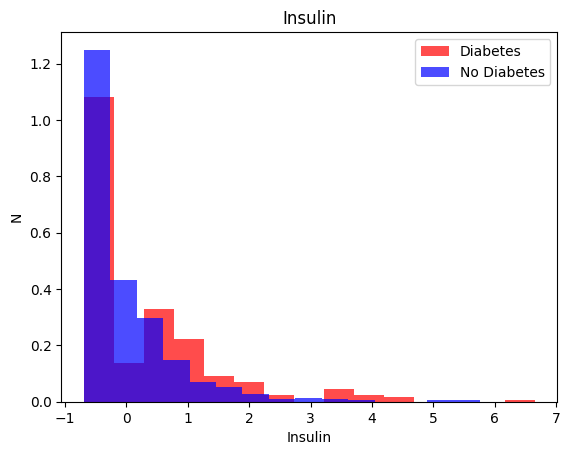

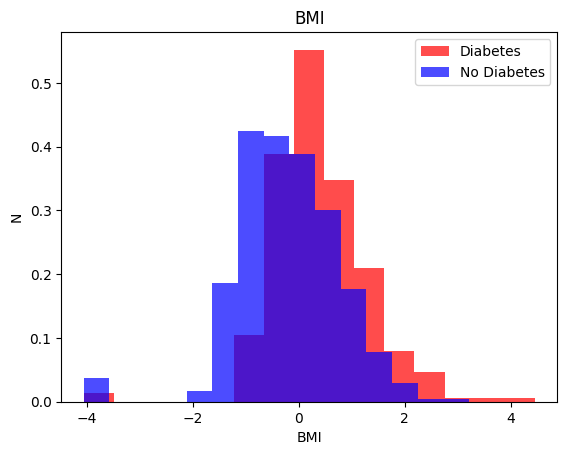

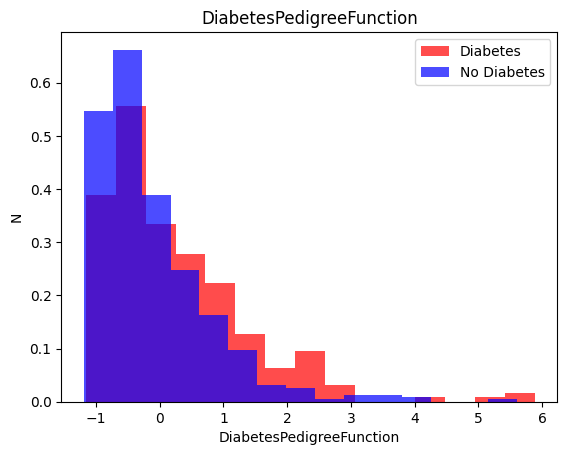

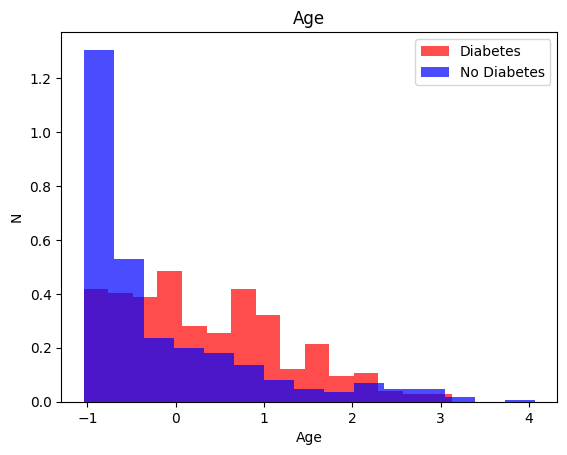

In [ ]:
for i in range(len(df.columns[:-1])):
  label = df.columns[i]
  plt.hist(transformed_df[transformed_df['Outcome']==1][label],color = 'red',label = 'Diabetes',alpha = 0.7, density = True,bins=15)
  plt.hist(transformed_df[transformed_df['Outcome']==0][label], color='blue',label = 'No Diabetes',alpha = 0.7, density = True,bins=15)
  plt.title(label)
  plt.ylabel('N')
  plt.xlabel(label)
  plt.legend()
  plt.show()

In [ ]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=0)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=0)

In [ ]:
X

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [-1.14185152,  0.31627232, -0.16054575, ...,  0.29285624,
        -0.83317917, -0.95646168],
       [ 0.93691372,  1.22388954, -0.78091875, ..., -0.18943689,
         0.35070735,  0.49003012],
       [-0.54791859, -0.40356202,  0.56322275, ..., -0.63365425,
        -0.6429117 ,  1.59617091]])

In [ ]:
model = tf.keras.Sequential([
  tf.keras.layers.Dense(16, activation='relu'),
  tf.keras.layers.Dense(16, activation='relu'),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss = tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [ ]:
model.evaluate(X_train, y_train)

19/19 [==============================] - 0s 2ms/step - loss: 0.7953 - accuracy: 0.4867


[0.7953374981880188, 0.4866666793823242]

In [ ]:
model.evaluate(X_valid, y_valid)

7/7 [==============================] - 0s 9ms/step - loss: 0.4628 - accuracy: 0.7650


[0.4627586305141449, 0.7649999856948853]

In [ ]:
## So this is not a good value for accuracy

In [ ]:
model.fit(X_train, y_train, batch_size=16, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
38/38 [==============================] - 1s 4ms/step - loss: 0.7269 - accuracy: 0.5133 - val_loss: 0.6789 - val_accuracy: 0.5700
Epoch 2/20
38/38 [==============================] - 0s 3ms/step - loss: 0.6486 - accuracy: 0.6650 - val_loss: 0.6344 - val_accuracy: 0.6700
Epoch 3/20
38/38 [==============================] - 0s 3ms/step - loss: 0.6115 - accuracy: 0.7250 - val_loss: 0.6022 - val_accuracy: 0.7100
Epoch 4/20
38/38 [==============================] - 0s 3ms/step - loss: 0.5816 - accuracy: 0.7417 - val_loss: 0.5734 - val_accuracy: 0.7150
Epoch 5/20
38/38 [==============================] - 0s 3ms/step - loss: 0.5576 - accuracy: 0.7567 - val_loss: 0.5496 - val_accuracy: 0.7250
Epoch 6/20
38/38 [==============================] - 0s 3ms/step - loss: 0.5398 - accuracy: 0.7500 - val_loss: 0.5310 - val_accuracy: 0.7300
Epoch 7/20
38/38 [==============================] - 0s 3ms/step - loss: 0.5277 - accuracy: 0.7517 - val_loss: 0.5188 - val_accuracy: 0.7300
Epoch 8/20
38/38 [==

In [ ]:
### So now there's significant improvement in accuracy due to oversampling and scaling

In [ ]:
model.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.4630 - accuracy: 0.7650


[0.4629575312137604, 0.7649999856948853]